In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
sns.set()

%matplotlib inline
from nsetools import Nse 
from bsedata.bse import BSE
from nsepy import get_history
import pandas_datareader.data as web
import datetime as dt
from datetime import date


In [2]:
# live stock data from nse
data = get_history(symbol="HEROMOTOCO", start = date(2020,9,7), end=date.today())
print (data)

                Symbol Series  Prev Close     Open     High      Low     Last  \
Date                                                                            
2020-09-07  HEROMOTOCO     EQ     2915.20  2930.00  2934.90  2852.00  2864.95   
2020-09-08  HEROMOTOCO     EQ     2860.15  2871.00  2903.20  2852.00  2861.00   
2020-09-09  HEROMOTOCO     EQ     2863.20  2847.00  2920.00  2830.20  2900.20   
2020-09-10  HEROMOTOCO     EQ     2904.00  2920.00  2957.40  2888.25  2940.60   
2020-09-11  HEROMOTOCO     EQ     2948.75  2949.15  3007.70  2948.75  2990.90   
...                ...    ...         ...      ...      ...      ...      ...   
2020-11-27  HEROMOTOCO     EQ     3024.55  3049.00  3118.55  3032.00  3085.00   
2020-12-01  HEROMOTOCO     EQ     3108.85  3120.00  3129.90  3075.05  3108.20   
2020-12-02  HEROMOTOCO     EQ     3110.25  3113.00  3177.10  3091.00  3123.00   
2020-12-03  HEROMOTOCO     EQ     3126.20  3156.00  3167.00  3125.50  3139.50   
2020-12-04  HEROMOTOCO     E

In [3]:
end = date.today()
start = dt.datetime(2020, 9, 7)

In [4]:
# live stock data from bse
#d = web.DataReader('HEROMOTOCO.BO', 'yahoo', start, end)
d = web.get_data_yahoo(['HEROMOTOCO.BO'],start=start,end=end) 

print (d)

Attributes     Adj Close         Close          High           Low  \
Symbols    HEROMOTOCO.BO HEROMOTOCO.BO HEROMOTOCO.BO HEROMOTOCO.BO   
Date                                                                 
2020-09-07   2859.750000   2859.750000   2934.750000   2853.050049   
2020-09-08   2862.449951   2862.449951   2920.000000   2852.050049   
2020-09-09   2903.350098   2903.350098   2920.000000   2833.550049   
2020-09-10   2948.550049   2948.550049   2956.750000   2890.000000   
2020-09-11   2991.399902   2991.399902   3007.250000   2949.800049   
...                  ...           ...           ...           ...   
2020-11-27   3104.649902   3104.649902   3119.149902   3032.300049   
2020-12-01   3111.600098   3111.600098   3150.000000   3075.000000   
2020-12-02   3125.800049   3125.800049   3175.000000   3097.000000   
2020-12-03   3139.350098   3139.350098   3166.949951   3127.000000   
2020-12-04   3177.699951   3177.699951   3201.399902   3152.949951   

Attributes         

Text(0, 0.5, 'Close Price')

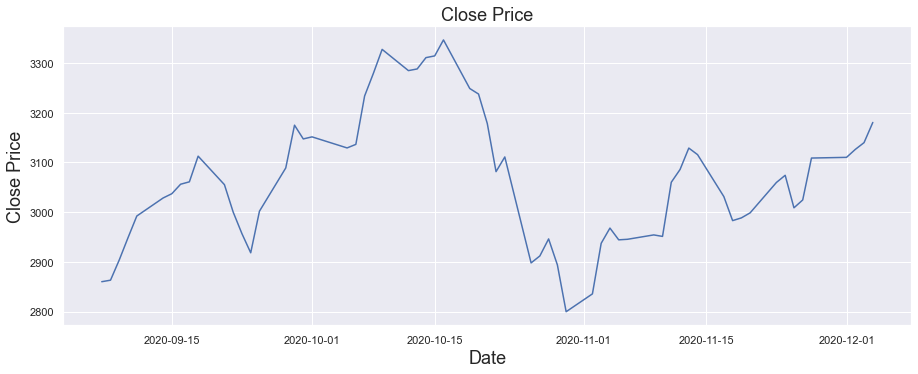

In [5]:
# Plot nse data
plt.figure(figsize=(15.2, 5.5))
plt.title('Close Price', fontsize=18)
plt.plot(data['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)

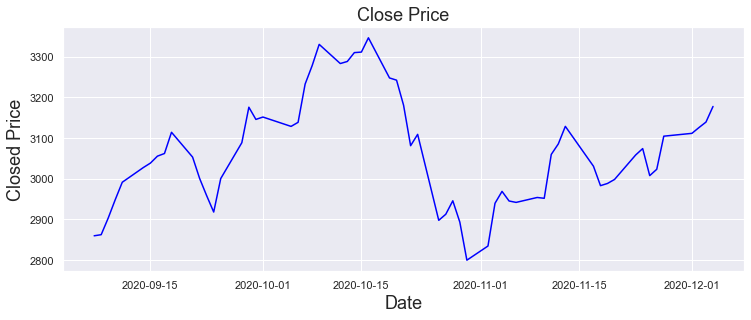

In [6]:
# plot bse data
plt.figure(figsize=(12.2, 4.5))
plt.title('Close Price', fontsize = 18)
plt.plot(d['Close'], label = 'Close Price', color = 'blue')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closed Price', fontsize = 18)
plt.show()

In [7]:
#diffrent dataFrame for close price of bse and nse

dt = d['Close']
dt['bse_data'] = d['Close']
dt['nse_data'] = data['Close']
dt

<ipython-input-7-16ca35000094>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['bse_data'] = d['Close']
<ipython-input-7-16ca35000094>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['nse_data'] = data['Close']


Symbols,HEROMOTOCO.BO,bse_data,nse_data
Date,,,
2020-09-07,2859.750000,2859.750000,2860.15
2020-09-08,2862.449951,2862.449951,2863.20
2020-09-09,2903.350098,2903.350098,2904.00
2020-09-10,2948.550049,2948.550049,2948.75
2020-09-11,2991.399902,2991.399902,2992.25
...,...,...,...
2020-11-27,3104.649902,3104.649902,3108.85
2020-12-01,3111.600098,3111.600098,3110.25
2020-12-02,3125.800049,3125.800049,3126.20


In [8]:
# function for buy and sell strategy

def func(data):
    
    buy_list = []
    sell_list = []
   # flag_buy = 0
   # flag_sell = 0
    
    for i in range(0, len(data)):
        if data['bse_data'][i] > data['nse_data'][i] :
            buy_list.append(data['nse_data'][i])
            sell_list.append(data['bse_data'][i])
           # flag_buy = 1
           # flag_sell = 0
        elif data['bse_data'][i] < data['nse_data'][i]:
            sell_list.append(data['nse_data'][i])
            buy_list.append(data['bse_data'][i])
          #  flag_buy = 0
          #  flag_sell = 1
        else:
            buy_list.append(0)
            sell_list.append(0)
            
    return (buy_list, sell_list)


In [9]:
# Adding profit per share column to newly created dataFrame

dt['Buy_price'] = func(dt)[0]
dt['Sell_price'] = func(dt)[1]
dt['Profit/Share'] = dt['Sell_price'] - dt['Buy_price']
dt

<ipython-input-9-fd3193363b53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Buy_price'] = func(dt)[0]
<ipython-input-9-fd3193363b53>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Sell_price'] = func(dt)[1]


Symbols,HEROMOTOCO.BO,bse_data,nse_data,Buy_price,Sell_price,Profit/Share
Date,,,,,,
2020-09-07,2859.750000,2859.750000,2860.15,2859.750000,2860.150000,0.400000
2020-09-08,2862.449951,2862.449951,2863.20,2862.449951,2863.200000,0.750049
2020-09-09,2903.350098,2903.350098,2904.00,2903.350098,2904.000000,0.649902
2020-09-10,2948.550049,2948.550049,2948.75,2948.550049,2948.750000,0.199951
2020-09-11,2991.399902,2991.399902,2992.25,2991.399902,2992.250000,0.850098
...,...,...,...,...,...,...
2020-11-27,3104.649902,3104.649902,3108.85,3104.649902,3108.850000,4.200098
2020-12-01,3111.600098,3111.600098,3110.25,3110.250000,3111.600098,1.350098
2020-12-02,3125.800049,3125.800049,3126.20,3125.800049,3126.200000,0.399951
